In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot.pandas

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [40]:
df=pd.read_csv(r"C:\Users\Rudraksh Kansal\OneDrive - IIT Kanpur\IITK Study\Data Science\Classification\Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# EDA

In [41]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [42]:
df.nunique()

Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [44]:
df=df.drop('Serial No.',axis=1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Data Visualization

Text(0.5, 1.0, 'Distribution of GRE Score')

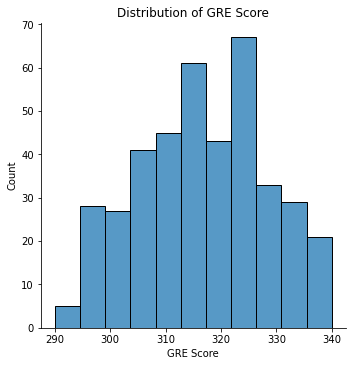

In [45]:
#CGPA distribution
sns.displot(df['GRE Score'].dropna(),kde=False)  
plt.title("Distribution of GRE Score")

Text(0.5, 1.0, 'Distribution of TOEFL Score')

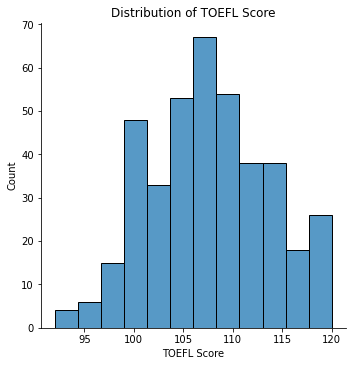

In [46]:
#TOEFL Score distribution
sns.displot(df['TOEFL Score'].dropna(),kde=False)  
plt.title("Distribution of TOEFL Score")

Text(0.5, 1.0, 'Distribution of CGPA')

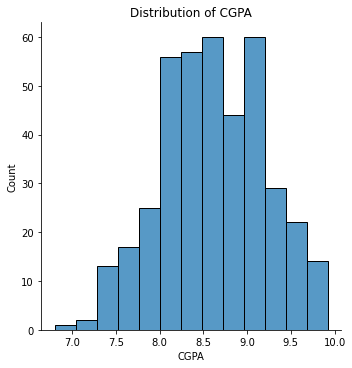

In [47]:
#CGPA distribution
sns.displot(df['CGPA'].dropna(),kde=False)  
plt.title("Distribution of CGPA")

Text(0.5, 1.0, 'Distribution of Chance of Admit')

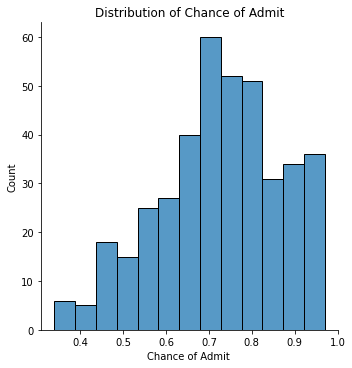

In [48]:
#Chance of Admit distribution
sns.displot(df['Chance of Admit '].dropna(),kde=False)  
plt.title("Distribution of Chance of Admit")

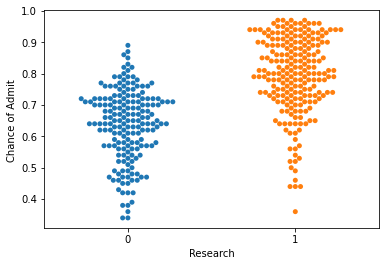

In [49]:
sns.swarmplot(x="Research", y="Chance of Admit ", data=df)
plt.show()

C:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


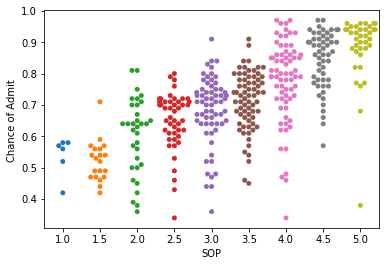

In [50]:
sns.swarmplot(x="SOP", y="Chance of Admit ", data=df)
plt.show()

C:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


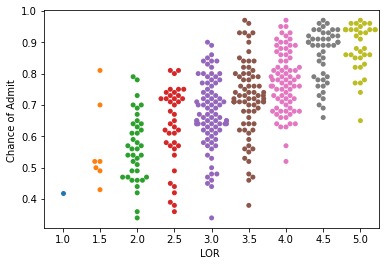

In [51]:
sns.swarmplot(x="LOR ", y="Chance of Admit ", data=df)
plt.show()

C:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


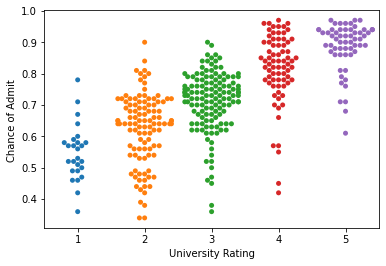

In [52]:
sns.swarmplot(x="University Rating", y="Chance of Admit ", data=df)
plt.show()

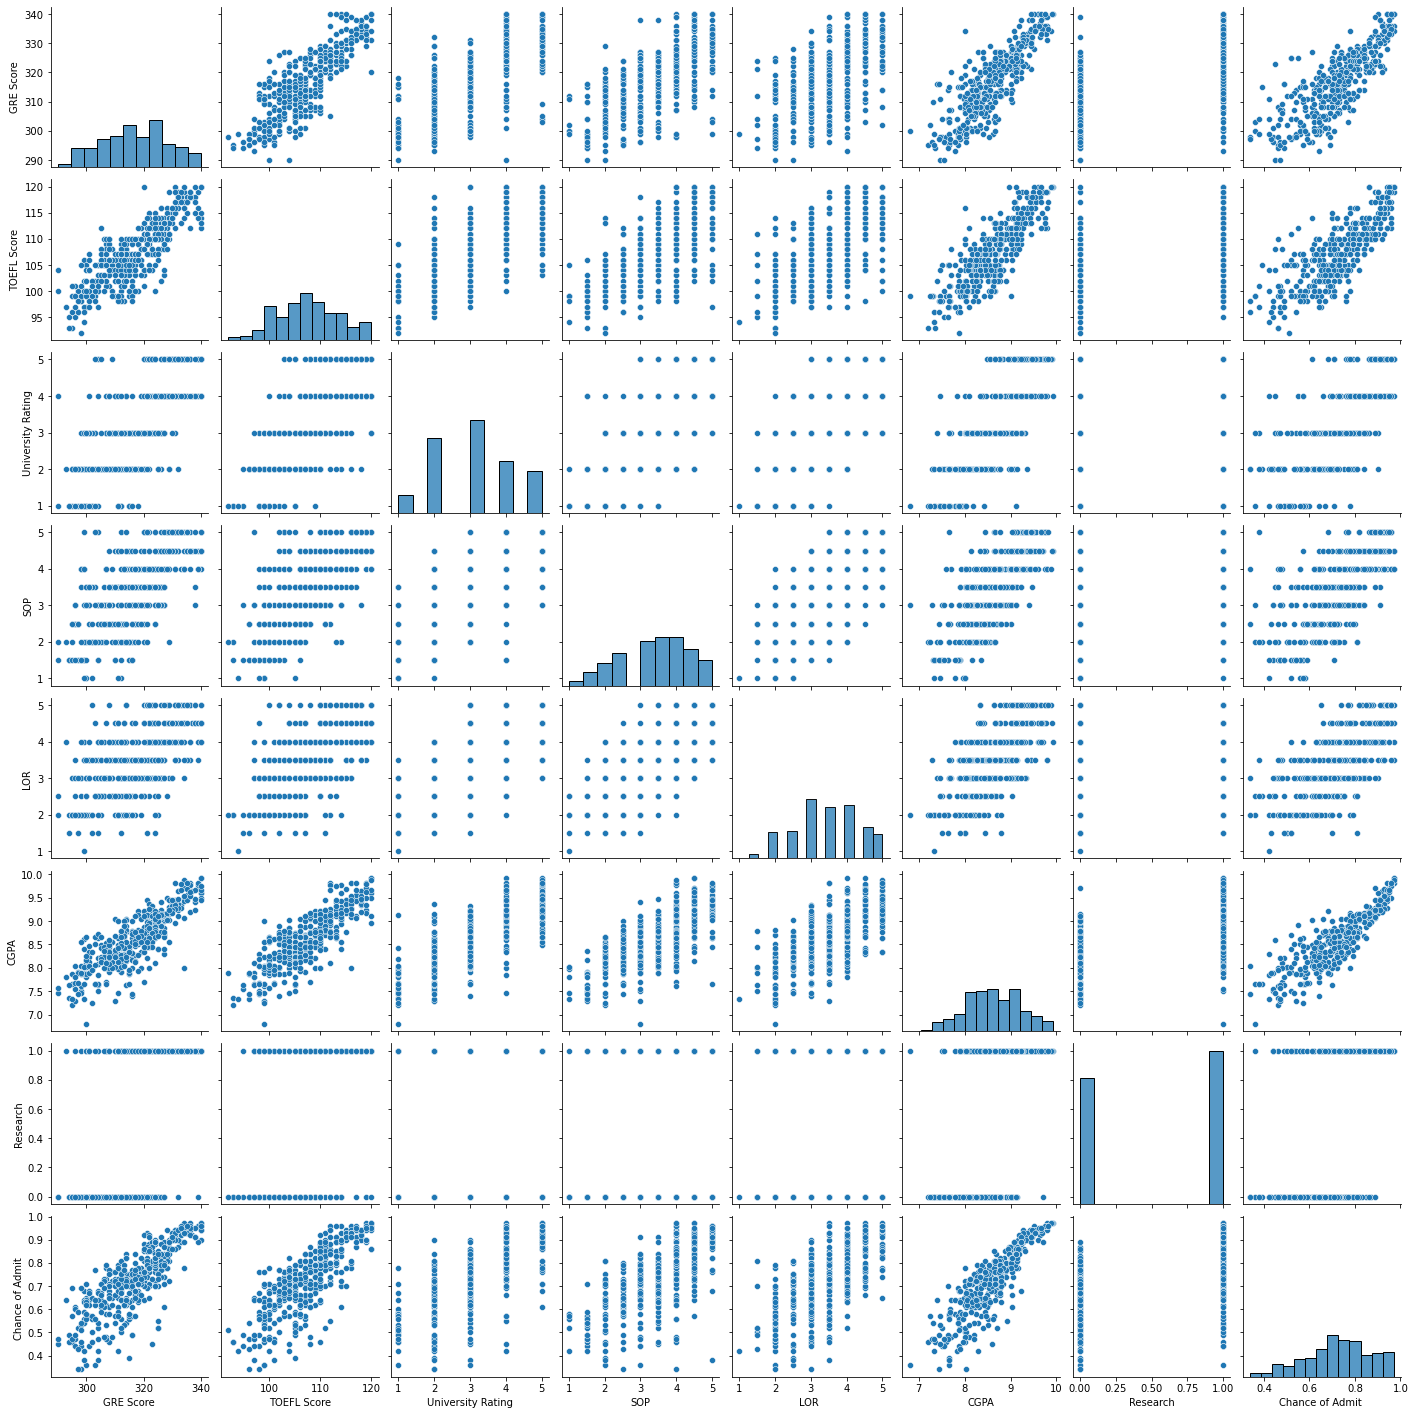

In [53]:
sns.pairplot(df)

C:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LOR ', ylabel='count'>

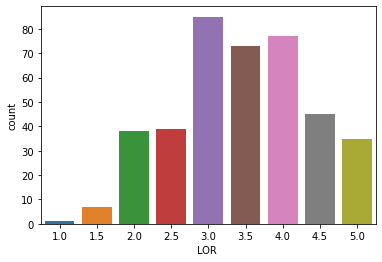

In [54]:
sns.countplot(df['LOR '])

C:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='University Rating', ylabel='count'>

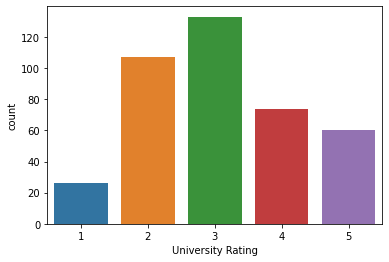

In [55]:
sns.countplot(df['University Rating'])

C:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SOP', ylabel='count'>

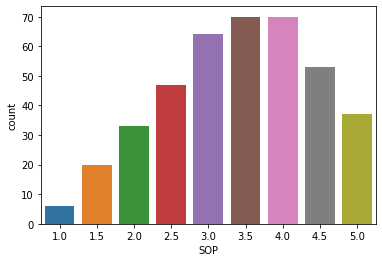

In [56]:
sns.countplot(df['SOP'])

C:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Research', ylabel='count'>

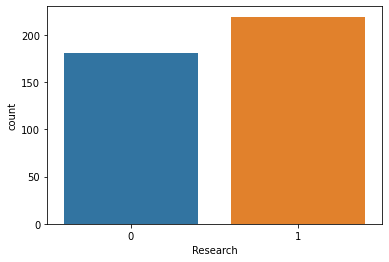

In [57]:
sns.countplot(df['Research'])

C:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


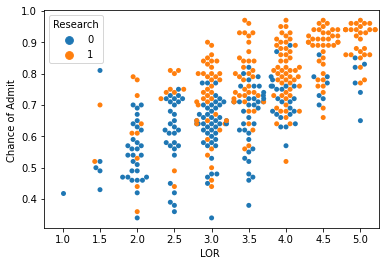

In [58]:
sns.swarmplot(x="LOR ", y="Chance of Admit ",hue='Research', data=df)
plt.show()

<AxesSubplot:>

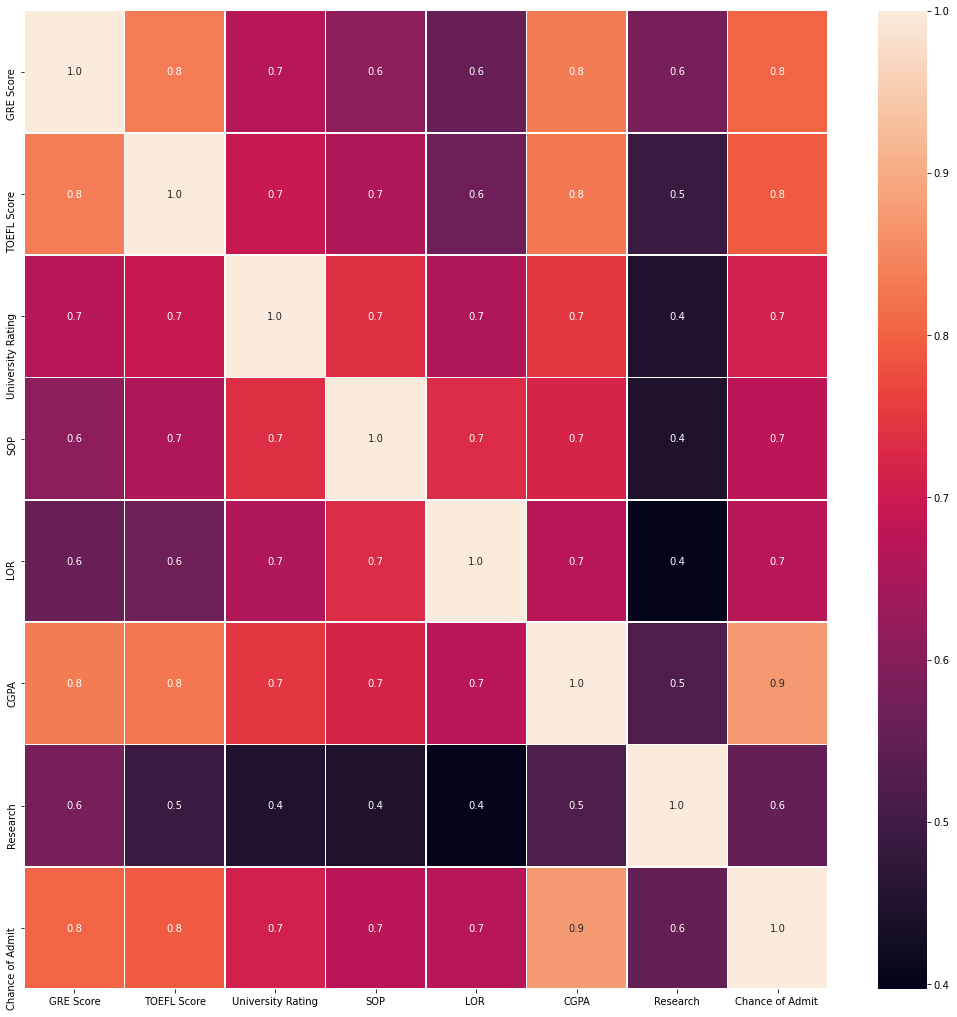

In [59]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Feature Engineering

In [60]:
# From the heartmap, it is clear that CGPA,TOEFL Score and GRE Score are highly correlated to Chance of Admit

In [61]:
X=df.drop('Chance of Admit ',axis=1)
y=df['Chance of Admit ']
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
#Generate Feature Importances
classifier = RandomForestRegressor()
classifier.fit(X,y)
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

In [64]:
clf_rf = RandomForestRegressor(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

In [65]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestRegressor()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA'], dtype='object')


Feature ranking:
1. feature 5 (0.764243)
2. feature 0 (0.110891)
3. feature 1 (0.038499)
4. feature 3 (0.037815)
5. feature 4 (0.022591)
6. feature 2 (0.014439)
7. feature 6 (0.011521)


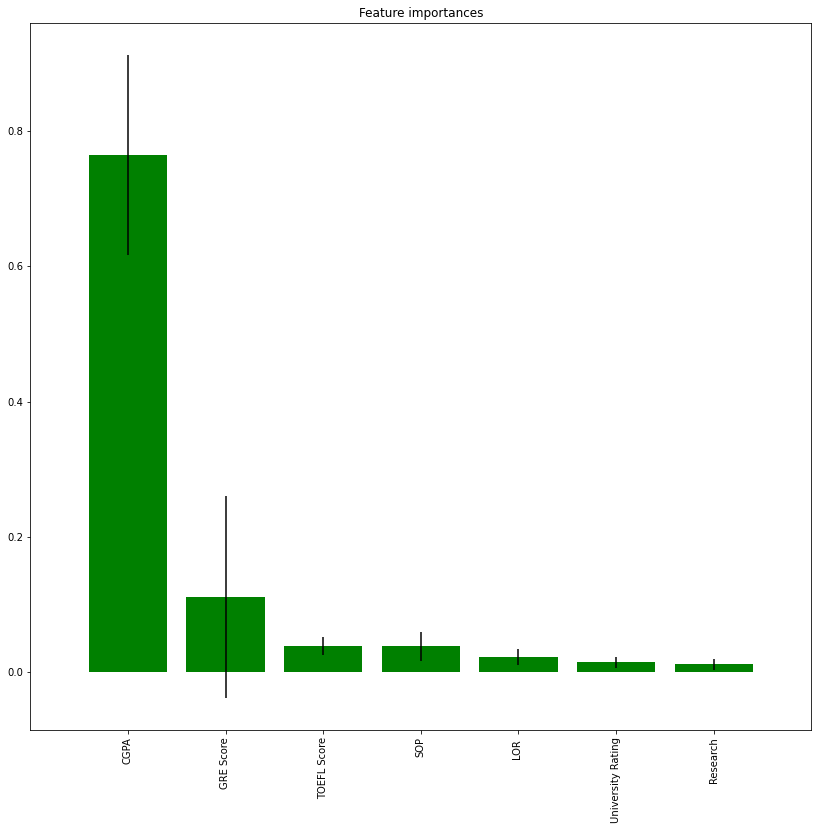

In [66]:
clf_rf_5 = RandomForestRegressor()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [67]:
x1=X.loc(axis=1)['GRE Score', 'TOEFL Score', 'SOP', 'CGPA','LOR ']
x1.head()

,GRE Score,TOEFL Score,SOP,CGPA,LOR
0,337,118,4.5,9.65,4.5
1,324,107,4.0,8.87,4.5
2,316,104,3.0,8.00,3.5
3,322,110,3.5,8.67,2.5
4,314,103,2.0,8.21,3.0


In [68]:
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=42)

In [69]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error

models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM :', SVR()],
           ['AdaBoostClassifier :', AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
           ['Xgboost: ', XGBRegressor()],
           ['CatBoost: ', CatBoostRegressor(logging_level='Silent')],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet()],
           ['HuberRegressor: ', HuberRegressor()]]

print("Results...")


for name,model in models:
    model = model
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Results...
DecisionTree : 0.10001666527800922
Linear Regression : 0.06967141806120086
RandomForest : 0.07225724646474331
KNeighbours : 0.1030776406404415
SVM : 0.0923747588887762
AdaBoostClassifier : 0.07549070871432635


C:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


GradientBoostingClassifier:  0.07478435336886456
Xgboost:  0.0788782191035244
CatBoost:  0.07547689884848859
Lasso:  0.13367031164663656
Ridge:  0.06974175508671986
BayesianRidge:  0.06978902003435493
ElasticNet:  0.1058755602950818
HuberRegressor:  0.08529967032766296


C:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# Preparing data for regression

In [70]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(x_train)
X_test = pipeline.transform(x_test)

# Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

pred = lin_reg.predict(X_test)

C:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [73]:
coeff_df = pd.DataFrame(lin_reg.coef_, x1.columns, columns=['Coefficient'])
coeff_df

,Coefficient
GRE Score,0.025755
TOEFL Score,0.020833
SOP,0.002992
CGPA,0.070664
LOR,0.014237


In [74]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

In [75]:
pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

In [76]:
# Evaluating model

test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('\nTrain set evaluation:\n')
print_evaluate(y_train, train_pred)

Test set evaluation:

MAE: 0.050495931352972506
MSE: 0.004854106494658644
RMSE: 0.069671418061201
R2 Square 0.7867566178781182


Train set evaluation:

MAE: 0.04331663592487343
MSE: 0.0038503478213622005
RMSE: 0.0620511709910635
R2 Square 0.7984625214512829



In [77]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.050496,0.004854,0.069671,0.786757,0.770383


# Robust Regression

In [78]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('\nTrain set evaluation:\n')
print_evaluate(y_train, train_pred)

Test set evaluation:

MAE: 0.052012073298181964
MSE: 0.005591002582267444
RMSE: 0.07477300704309975
R2 Square 0.7543843956850134


Train set evaluation:

MAE: 0.0443296888532579
MSE: 0.004234325088880558
RMSE: 0.06507169191653586
R2 Square 0.7783641267331928



In [79]:
results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.050496,0.004854,0.069671,0.786757,0.770383
1,Robust Regression,0.052012,0.005591,0.074773,0.754384,0.770960


# Ridge Regression

In [80]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('\nTrain set evaluation:\n')
print_evaluate(y_train, train_pred)

Test set evaluation:

MAE: 0.052900453531605926
MSE: 0.005399841186536571
RMSE: 0.07348361168680109
R2 Square 0.7627822136153877


Train set evaluation:

MAE: 0.04560713673651293
MSE: 0.004149836072834132
RMSE: 0.06441922129950138
R2 Square 0.7827865072684231



In [81]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.050496,0.004854,0.069671,0.786757,0.770383
1,Robust Regression,0.052012,0.005591,0.074773,0.754384,0.770960
2,Ridge Regression,0.052900,0.005400,0.073484,0.762782,0.770573


# LASSO Regression

In [82]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
              warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('\nTrain set evaluation:\n')
print_evaluate(y_train, train_pred)

Test set evaluation:

MAE: 0.10770386173250936
MSE: 0.018003866314257298
RMSE: 0.13417848677883237
R2 Square 0.20908094036523006


Train set evaluation:

MAE: 0.09607275867462958
MSE: 0.014492398675767643
RMSE: 0.12038437886938505
R2 Square 0.2414291843889439



In [83]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.050496,0.004854,0.069671,0.786757,0.770383
1,Robust Regression,0.052012,0.005591,0.074773,0.754384,0.770960
2,Ridge Regression,0.052900,0.005400,0.073484,0.762782,0.770573
3,Lasso Regression,0.107704,0.018004,0.134178,0.209081,0.182773


# Elastic Net

In [84]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('\nTrain set evaluation:\n')
print_evaluate(y_train, train_pred)

Test set evaluation:

MAE: 0.10069852218993632
MSE: 0.01591222286389217
RMSE: 0.12614365962620622
R2 Square 0.3009679074187429


Train set evaluation:

MAE: 0.08982262116751195
MSE: 0.012647529511351474
RMSE: 0.11246123559409915
R2 Square 0.3379945589729917



In [85]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.050496,0.004854,0.069671,0.786757,0.770383
1,Robust Regression,0.052012,0.005591,0.074773,0.754384,0.770960
2,Ridge Regression,0.052900,0.005400,0.073484,0.762782,0.770573
3,Lasso Regression,0.107704,0.018004,0.134178,0.209081,0.182773
4,Elastic Net Regression,0.100699,0.015912,0.126144,0.300968,0.496238


# Polynomial Regression

In [86]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('\nTrain set evaluation:\n')
print_evaluate(y_train, train_pred)

Test set evaluation:

MAE: 0.04953205136658111
MSE: 0.004975822045820449
RMSE: 0.07053950698594688
R2 Square 0.7814095914346043


Train set evaluation:

MAE: 0.04224486723663245
MSE: 0.003591806956133006
RMSE: 0.05993168574412876
R2 Square 0.8119952401815251



C:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [87]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.050496,0.004854,0.069671,0.786757,0.770383
1,Robust Regression,0.052012,0.005591,0.074773,0.754384,0.770960
2,Ridge Regression,0.052900,0.005400,0.073484,0.762782,0.770573
3,Lasso Regression,0.107704,0.018004,0.134178,0.209081,0.182773
4,Elastic Net Regression,0.100699,0.015912,0.126144,0.300968,0.496238
5,Polynomail Regression,0.049532,0.004976,0.070540,0.781410,0.000000


# Stochastic Gradient Descent

In [88]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('\nTrain set evaluation:\n')
print_evaluate(y_train, train_pred)

Test set evaluation:

MAE: 0.3644821969562915
MSE: 0.1382356361955333
RMSE: 0.3718005328069519
R2 Square -5.072762232254757


Train set evaluation:

MAE: 0.3770769452016706
MSE: 0.14652367992713203
RMSE: 0.3827841166076931
R2 Square -6.669440364934652



In [89]:
results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.050496,0.004854,0.069671,0.786757,0.770383
1,Robust Regression,0.052012,0.005591,0.074773,0.754384,0.770960
2,Ridge Regression,0.052900,0.005400,0.073484,0.762782,0.770573
3,Lasso Regression,0.107704,0.018004,0.134178,0.209081,0.182773
4,Elastic Net Regression,0.100699,0.015912,0.126144,0.300968,0.496238
5,Polynomail Regression,0.049532,0.004976,0.070540,0.781410,0.000000
6,Stochastic Gradient Descent,0.364482,0.138236,0.371801,-5.072762,0.000000


# Random Forest Regressor

In [90]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('\nTrain set evaluation:\n')
print_evaluate(y_train, train_pred)

Test set evaluation:

MAE: 0.051479500000000775
MSE: 0.005249907991666743
RMSE: 0.07245624881034585
R2 Square 0.7693688555857612


Train set evaluation:

MAE: 0.018576642857142094
MSE: 0.0006679627871428578
RMSE: 0.025844976052278666
R2 Square 0.9650370454486581



In [91]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.050496,0.004854,0.069671,0.786757,0.770383
1,Robust Regression,0.052012,0.005591,0.074773,0.754384,0.770960
2,Ridge Regression,0.052900,0.005400,0.073484,0.762782,0.770573
3,Lasso Regression,0.107704,0.018004,0.134178,0.209081,0.182773
4,Elastic Net Regression,0.100699,0.015912,0.126144,0.300968,0.496238
5,Polynomail Regression,0.049532,0.004976,0.070540,0.781410,0.000000
6,Stochastic Gradient Descent,0.364482,0.138236,0.371801,-5.072762,0.000000
7,Random Forest Regressor,0.051480,0.005250,0.072456,0.769369,0.000000


# Support Vector Machine

In [92]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('\nTrain set evaluation:\n')
print_evaluate(y_train, train_pred)

Test set evaluation:

MAE: 0.31086944613152856
MSE: 0.3414442905066778
RMSE: 0.5843323459356651
R2 Square -13.99982239655634


Train set evaluation:

MAE: 0.0011710896745635976
MSE: 2.011441896891645e-06
RMSE: 0.0014182531145362047
R2 Square 0.9998947157641453



In [93]:
results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.050496,0.004854,0.069671,0.786757,0.770383
1,Robust Regression,0.052012,0.005591,0.074773,0.754384,0.770960
2,Ridge Regression,0.052900,0.005400,0.073484,0.762782,0.770573
3,Lasso Regression,0.107704,0.018004,0.134178,0.209081,0.182773
4,Elastic Net Regression,0.100699,0.015912,0.126144,0.300968,0.496238
5,Polynomail Regression,0.049532,0.004976,0.070540,0.781410,0.000000
6,Stochastic Gradient Descent,0.364482,0.138236,0.371801,-5.072762,0.000000
7,Random Forest Regressor,0.051480,0.005250,0.072456,0.769369,0.000000
8,SVM Regressor,0.310869,0.341444,0.584332,-13.999822,0.000000


# Artficial Neural Network

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=100)

Epoch 1/100
280/280 [==============================] - 1s 1ms/step - loss: 0.3925 - val_loss: 0.2609
Epoch 2/100
280/280 [==============================] - 0s 784us/step - loss: 0.2054 - val_loss: 0.1497
Epoch 3/100
280/280 [==============================] - 0s 784us/step - loss: 0.1365 - val_loss: 0.1187
Epoch 4/100
280/280 [==============================] - 0s 728us/step - loss: 0.1139 - val_loss: 0.1016
Epoch 5/100
280/280 [==============================] - 0s 728us/step - loss: 0.0992 - val_loss: 0.0885
Epoch 6/100
280/280 [==============================] - 0s 896us/step - loss: 0.0841 - val_loss: 0.0774
Epoch 7/100
280/280 [==============================] - 0s 784us/step - loss: 0.0732 - val_loss: 0.0682
Epoch 8/100
280/280 [==============================] - 0s 728us/step - loss: 0.0646 - val_loss: 0.0595
Epoch 9/100
280/280 [==============================] - 0s 784us/step - loss: 0.0552 - val_loss: 0.0514
Epoch 10/100
280/280 [==============================] - 0s 784us/step - los

In [95]:
pd.DataFrame(r.history).hvplot.line(y=['loss', 'val_loss'])

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [96]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('\nTrain set evaluation:\n')
print_evaluate(y_train, train_pred)

Test set evaluation:

MAE: 0.056412901957829796
MSE: 0.006025624773485695
RMSE: 0.07762489789678113
R2 Square 0.7352912204317332


Train set evaluation:

MAE: 0.04519114473462105
MSE: 0.0038573739174530015
RMSE: 0.06210776052517915
R2 Square 0.7980947568347138



In [97]:
results_df_2 = pd.DataFrame(data=[["Artficial Neural Network", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.050496,0.004854,0.069671,0.786757,0.770383
1,Robust Regression,0.052012,0.005591,0.074773,0.754384,0.770960
2,Ridge Regression,0.052900,0.005400,0.073484,0.762782,0.770573
3,Lasso Regression,0.107704,0.018004,0.134178,0.209081,0.182773
4,Elastic Net Regression,0.100699,0.015912,0.126144,0.300968,0.496238
5,Polynomail Regression,0.049532,0.004976,0.070540,0.781410,0.000000
6,Stochastic Gradient Descent,0.364482,0.138236,0.371801,-5.072762,0.000000
7,Random Forest Regressor,0.051480,0.005250,0.072456,0.769369,0.000000
8,SVM Regressor,0.310869,0.341444,0.584332,-13.999822,0.000000
9,Artficial Neural Network,0.056413,0.006026,0.077625,0.735291,0.000000


# Model Comparision

<AxesSubplot:ylabel='Model'>

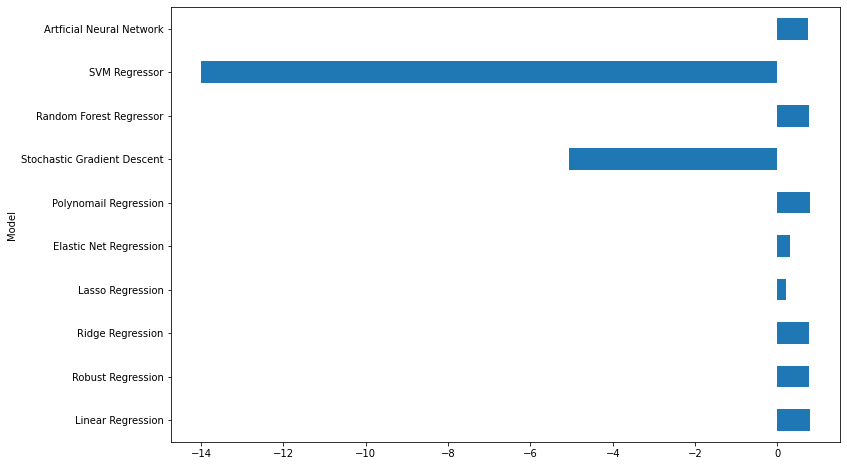

In [98]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

# Thus, Linear Regression is the best model for the dataset with R2 square = 78.7% and RMSE = 7% 